# About Case Study

**Aerofit** is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as **treadmills, exercise bikes, gym equipment, and fitness accessories** to cater to the needs of all categories of people.

#### Defining Problem Statement

### Business Problem

The market research team at AeroFit wants **to identify the characteristics of the target audience for each type of treadmill** offered by the company, **to provide a better recommendation of the treadmills to the new customers**. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

### Objective

 - Create a descriptive analytics **to create a customer profile for each AeroFit treadmill product** by developing appropriate tables and charts.
 - For each AeroFit treadmill product, **construct two-way contingency tables and compute all conditional and marginal probabilities** along with their insights/impact on the business.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Reading data and Analysing basic metrics

In [2]:
df=pd.read_csv("aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Dataset Characteristics

Dataset contains following columns

 - **Product**: KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers
 - **Age** : In years, age of the customer who purchased
 - **Gender**: Gender of the purchased customer
 - **Education**: represented in years
 - **Marital Status**: Single or partnered
 - **Usage**: The average number of times the customer has planned to use the treadmill each week
 - **Fitness**: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
 - **Miles**: The average number of miles the customer expects to walk or run each week
 - **Income**: Annual income of the user in Dollars $

In [4]:
df.shape

(180, 9)

Dataset contains 180 rows and 9 columns

In [5]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Dataset doesn't have any null value or missing value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


 - Product, Gender and Marital Status are **object(string)**
 - Age, Education, Usage, Fitness, Income and Miles are in **int64(integer)**

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Descriptive Analysis

 - Total count of all columns is 180
 - Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.
 - Education: Mean Education is 15 with maximum as 21 and minimum as 12.
 - Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
 - Fitness: Average rating is 3.3 on a scale of 1 to 5.
 - Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
 - Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

### Conversion of categorical attributes to 'category' 

In [8]:
# Converting Int data type of fitness rating to object data type
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [9]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


Categorization of **Fitness Rating** to following **descriptive categories**


1: Poor Shape

2: Bad Shape

3: Average Shape

4: Good Shape

5: Excellent Shape

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           180 non-null    object
 1   Age               180 non-null    int64 
 2   Gender            180 non-null    object
 3   Education         180 non-null    int64 
 4   MaritalStatus     180 non-null    object
 5   Usage             180 non-null    int64 
 6   Fitness           180 non-null    int64 
 7   Income            180 non-null    int64 
 8   Miles             180 non-null    int64 
 9   Fitness_category  180 non-null    object
dtypes: int64(6), object(4)
memory usage: 14.2+ KB


#### Seperating Categorical and Numerical columns

In [11]:
cat_cols=df.dtypes=="object"
cat_cols=list(cat_cols[cat_cols].index)
cat_cols

['Product', 'Gender', 'MaritalStatus', 'Fitness_category']

In [12]:
num_cols=df.dtypes!="object"
num_cols=list(num_cols[num_cols].index)
num_cols

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Univariate Analysis on Categorical columns

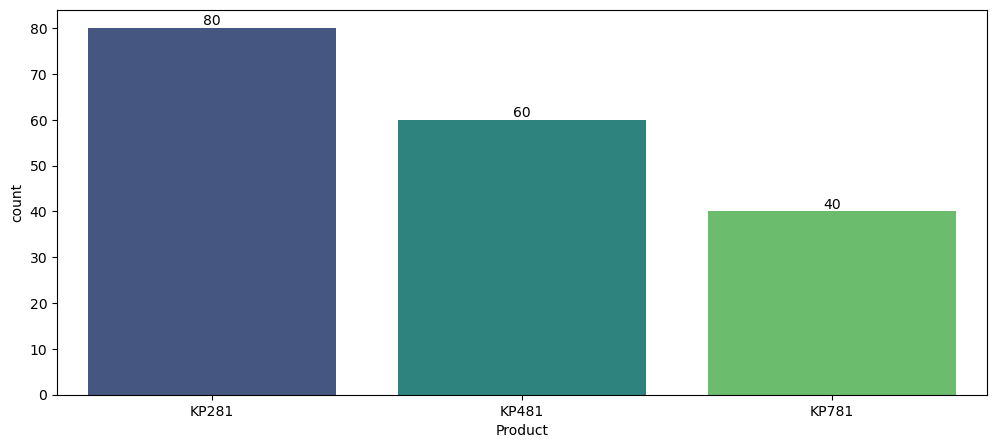

In [16]:
plt.figure(figsize=(12, 5))
plot=sns.countplot(df["Product"],palette = "viridis")
for i in plot.containers:
 plot.bar_label(i)


- **KP281** is the most commonly purchase product type
- **KP481** is the second most commonly purchase product type
- **KP781** is the least purchased product type


In [17]:
gender_counts=df["Gender"].value_counts()
gender_counts

Male      104
Female     76
Name: Gender, dtype: int64

In [18]:
values=gender_counts.values.tolist()
values

[104, 76]

In [19]:
gender_index=df['Gender'].unique().tolist()
gender_index

['Male', 'Female']

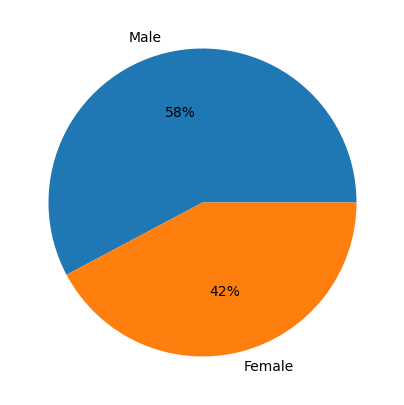

In [20]:
plt.figure(figsize=(12, 5))
plt.pie(values, labels = gender_index,autopct='%.0f%%')
plt.show()

- Majority of the customers are Males

In [21]:
status_count=df['MaritalStatus'].value_counts()
status_count

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [22]:
values=status_count.values.tolist()
values

[107, 73]

In [23]:
status_index=status_count.index.to_list()
status_index

['Partnered', 'Single']

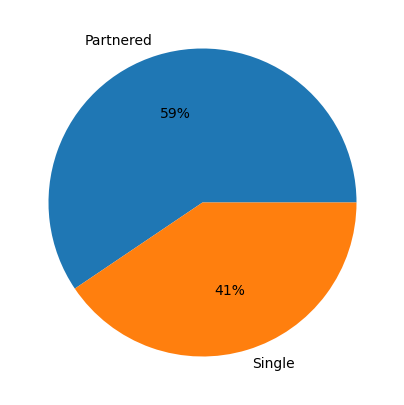

In [24]:
plt.figure(figsize=(12, 5))
plt.pie(values, labels = status_index,autopct='%.0f%%')
plt.show()

- Majority of the customers who have purchased are Married/Partnered

In [25]:
fitness_count=df['Fitness_category'].value_counts()
fitness_index=list(fitness_count.index)
values=fitness_count

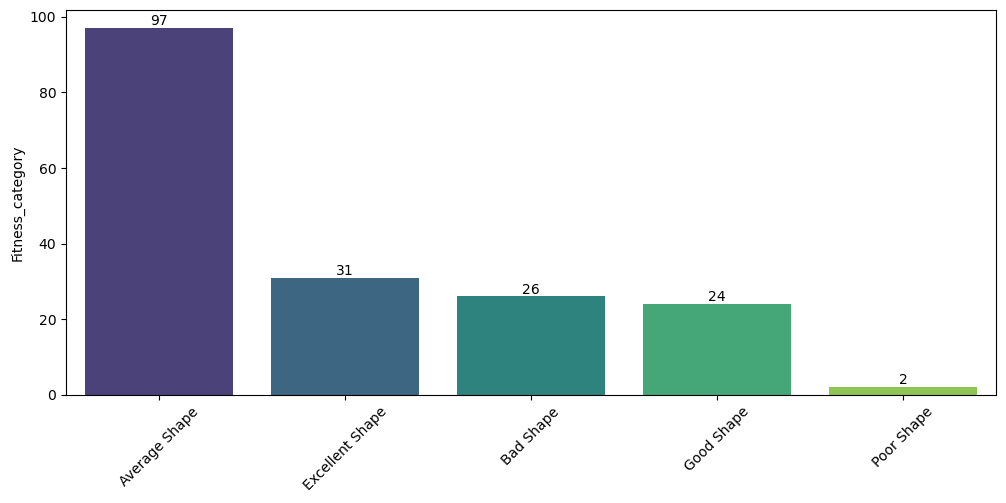

In [26]:
plt.figure(figsize=(12, 5))
plot=sns.barplot(fitness_index,values,palette = "viridis")
plt.xticks(rotation = 45, fontsize = 10)
for i in plot.containers:
 plot.bar_label(i)

- (97 out of 180) which is **53.8 %**  customers rated themselves 3 on a scale of 1 to 5 i.e Average shape
- (31 out of 180) which is **17.2 %** customers rated themselves 5 on a scale of 1 to 5 i.e Excellent shape
- (26 out of 180) which is **14.4 %** customers rated themselves 2 on a scale of 1 to 5 i.e Bad shape
- (24 out of 180) which is **13.3 %** customers rated themselves 4 on a scale of 1 to 5 i.e Good shape
- (2 out of 180) which is **1.1 %** customers rated themselves 1 on a scale of 1 to 5 i.e Poor shape

# Univariate Analysis on Numerical Columns

<AxesSubplot:xlabel='Age', ylabel='Density'>

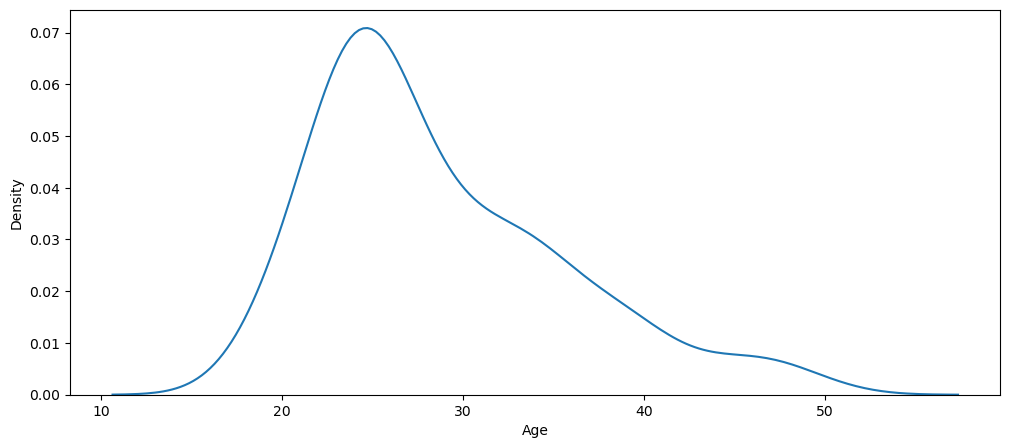

In [27]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df["Age"])

- Most of the customers age falls in the range of 21 to 35

<AxesSubplot:xlabel='Age'>

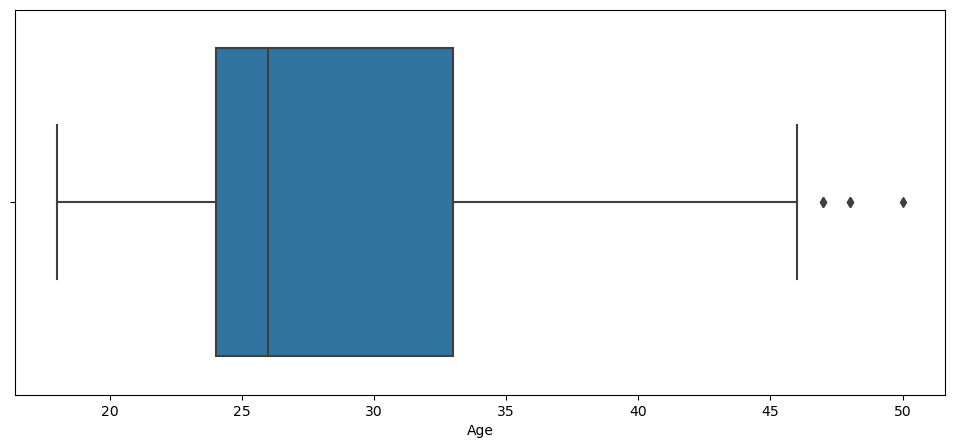

In [28]:
plt.figure(figsize=(12, 5))
sns.boxplot(df["Age"])

 - 23 to 34 is the most common customer age group that has purchased the product
 - Above 45 years old customers are very few compared to the young age group given in the dataset

<AxesSubplot:xlabel='Education', ylabel='Density'>

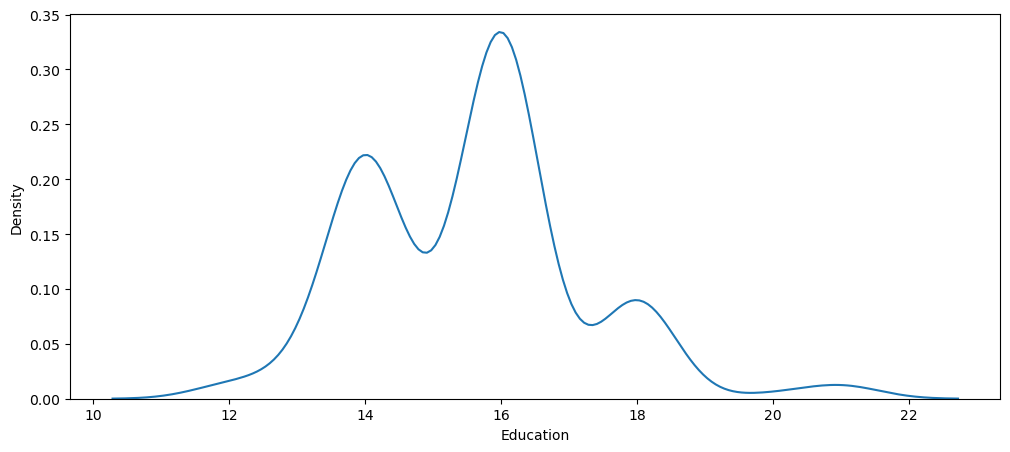

In [29]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df['Education'])

- Highest number of customers have 16 years of Education
- 14 is the second highest education among the customers
- 20 is the least education among the customers

<AxesSubplot:xlabel='Usage'>

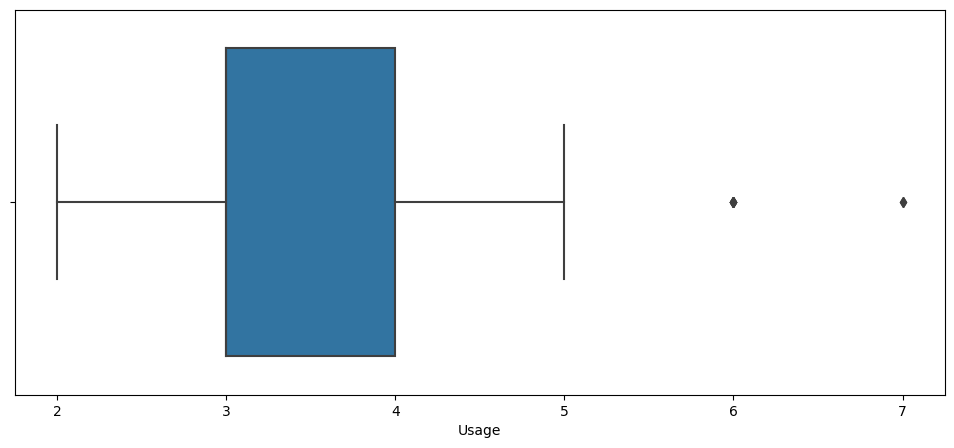

In [30]:
plt.figure(figsize=(12, 5))
sns.boxplot(df["Usage"])

- 3 to 4 days is the most preferred usage days for customers
- 6 and 7 days per week is roughly the usage days for few customers (**Outliers**)

<AxesSubplot:xlabel='Income'>

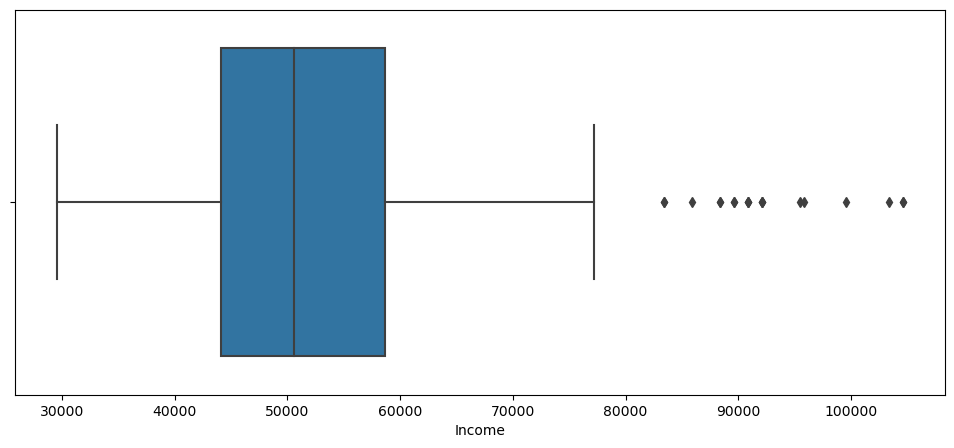

In [31]:
plt.figure(figsize=(12, 5))
sns.boxplot(df["Income"])

- Majority of the customers earns roughly between 45k to 60k
- Few customers earn more than 80 k (**Outliers**)

<AxesSubplot:xlabel='Miles'>

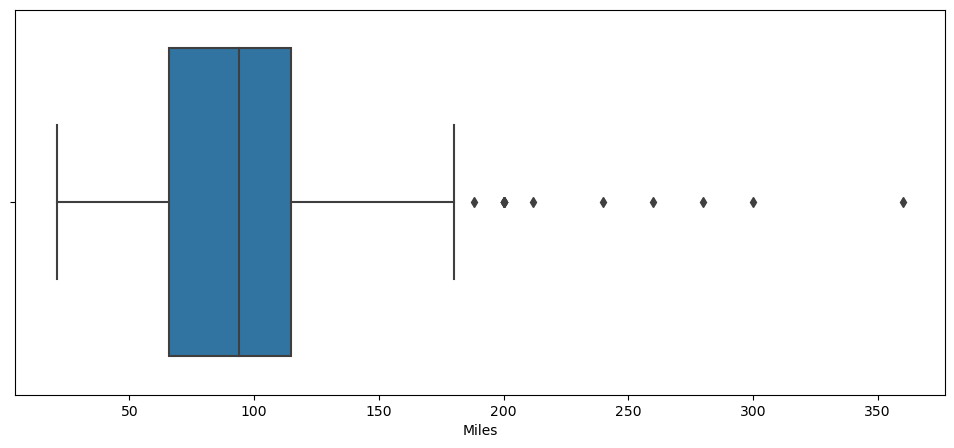

In [32]:
plt.figure(figsize=(12, 5))
sns.boxplot(df["Miles"])

- Most of the customers expect to walk or run is rougly between 50 to 105 miles each week
- There are few customers who expect to walk or run is more than 190 miles (**Outliers**)

# Bi-Variate Analysis on categorical columns

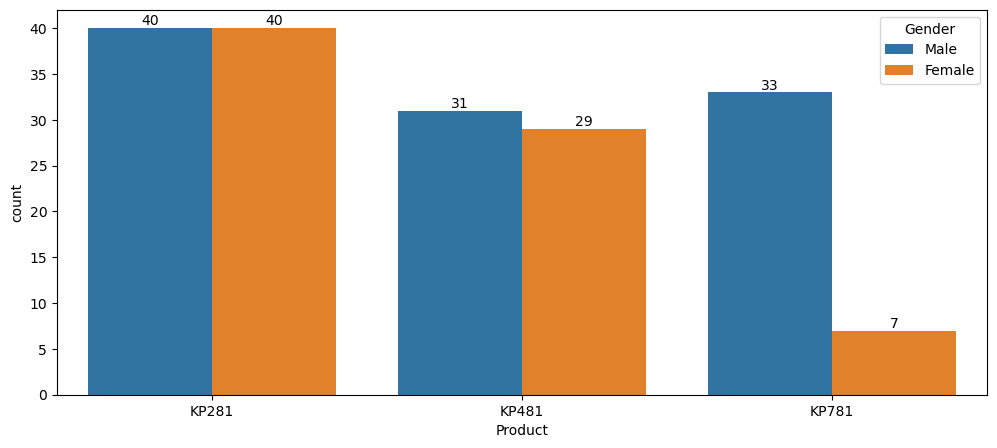

In [33]:
plt.figure(figsize=(12, 5))
plot=sns.countplot(df["Product"],hue=df["Gender"])
for i in plot.containers:
 plot.bar_label(i)


- **KP281** is purchased by both male and female customers equally
- **KP481** is purchased by males and females in roughly equal distribution.
- **KP781** is predominantly favored by male customers compared to females

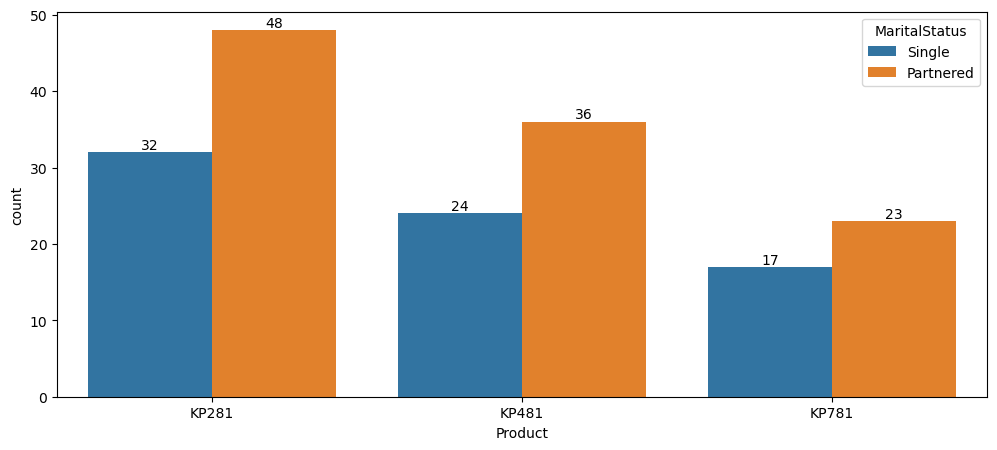

In [34]:
plt.figure(figsize=(12, 5))
plot=sns.countplot(df["Product"],hue=df["MaritalStatus"])
for i in plot.containers:
 plot.bar_label(i)

- All three products are more frequently purchased by married or partnered individuals in comparison to singles

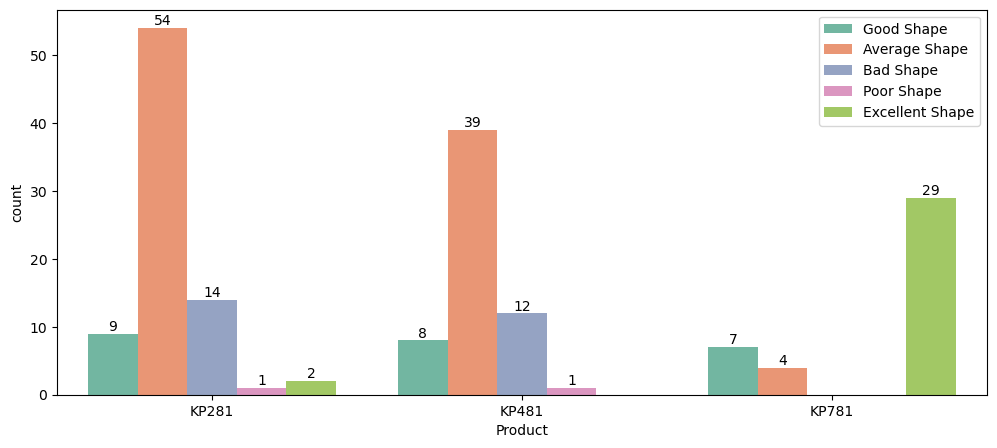

In [35]:
plt.figure(figsize=(12, 5))
plot=sns.countplot(df["Product"],hue=df["Fitness_category"],palette="Set2")
plt.legend(loc="upper right")
for i in plot.containers:
 plot.bar_label(i)

- Majority users of **KP281** and **KP481** rated themselves 3 on a scale of 1-5 i.e Average Shape
- Intrestingly mojority users of **KP781** rated themselves 5 on a scale of 1-5  i.e Excellent Shape

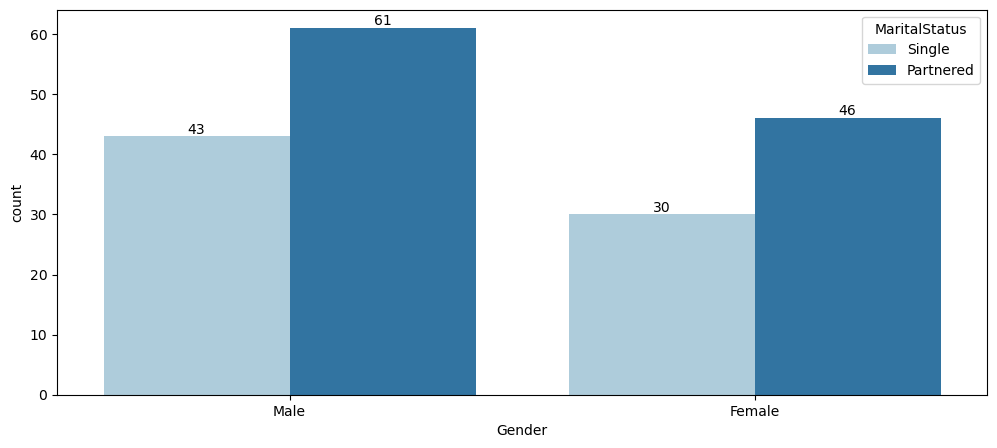

In [36]:
plt.figure(figsize=(12, 5))
plot=sns.countplot(df["Gender"],hue=df["MaritalStatus"],palette="Paired")
for i in plot.containers:
 plot.bar_label(i)


 - Partnered customers are the most buyers of aerofit product
 - Out of both Single and Partnered customers, Male customers are significantly high
 - Female customers are considerably low compared to Male customers

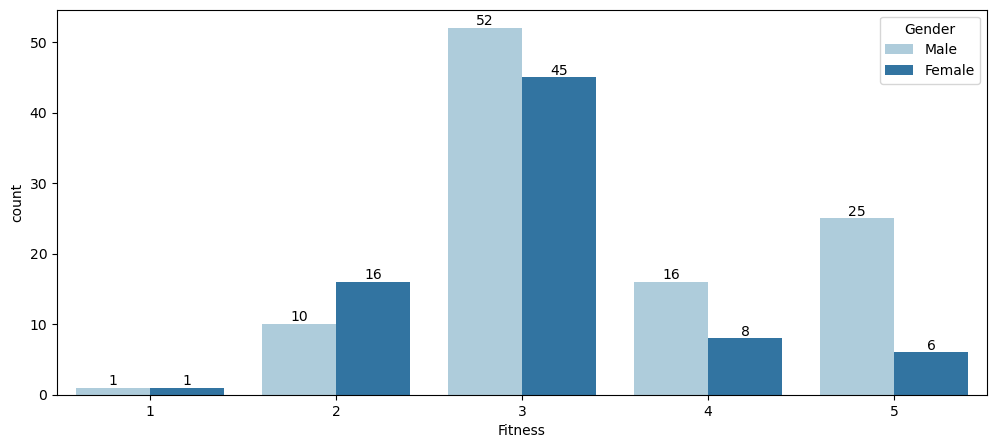

In [37]:
plt.figure(figsize=(12, 5))
plot=sns.countplot(df["Fitness"],hue=df["Gender"],palette="Paired")
for i in plot.containers:
 plot.bar_label(i)

- Among the fitness rating both Male and Female most have rated as average
- Significant number of Male customers are at Excellent shape compared to Female customers

# Bi-Variate Analysis on numerical columns

In [38]:
num_cols

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

<AxesSubplot:xlabel='Age', ylabel='Income'>

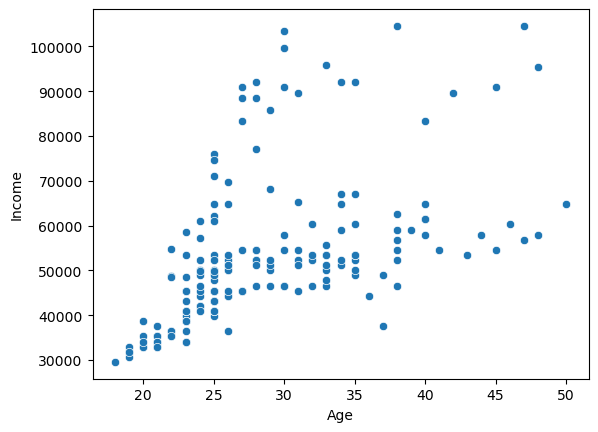

In [39]:

sns.scatterplot(df["Age"],df["Income"],palette='Paired')

- As customers' age increases, there appears to be a correlation with higher earnings.


<AxesSubplot:xlabel='Miles', ylabel='Income'>

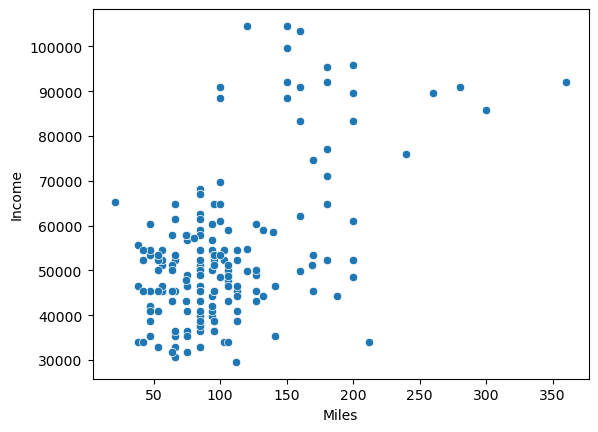

In [40]:
sns.scatterplot(df["Miles"],df["Income"],palette='Paired')

- A small number of customers who run more than 150 miles tend to possess higher salaries.

In [41]:
cat_cols

['Product', 'Gender', 'MaritalStatus', 'Fitness_category']

In [42]:
num_cols

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Bi-Variate Analysis on Numericals and Categorical columns

<AxesSubplot:xlabel='Gender', ylabel='Age'>

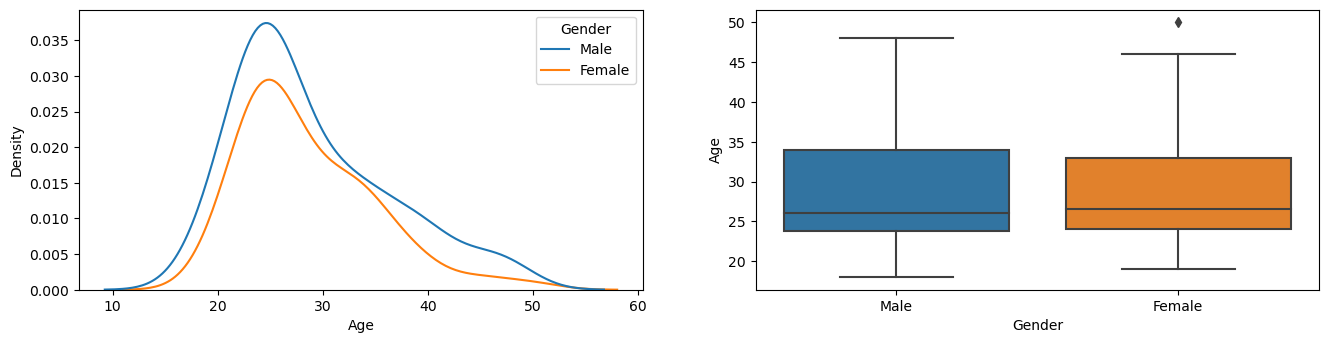

In [43]:
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.kdeplot(df["Age"],hue=df["Gender"])
plt.subplot(2,2,2)
sns.boxplot(x=df["Gender"],y=df["Age"])

- The majority of both male and female customers fall within the age range of 25 to 35.

<AxesSubplot:xlabel='Product', ylabel='Age'>

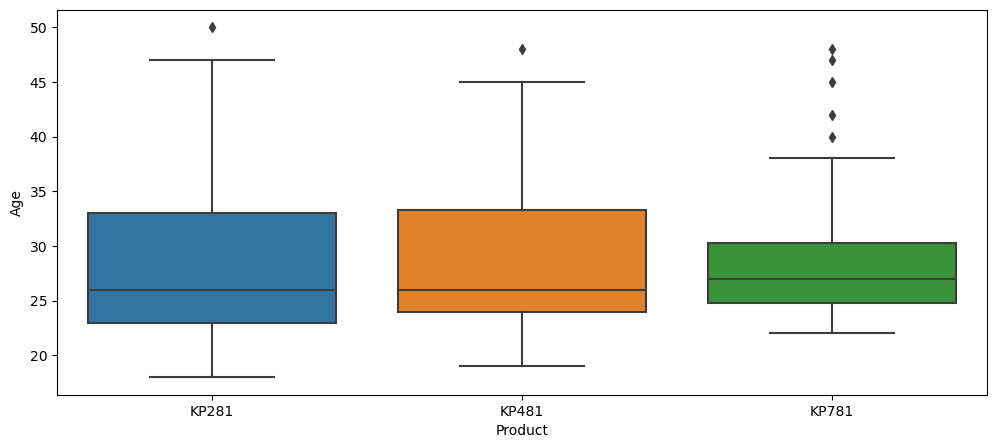

In [44]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Product"],y=df["Age"])

 - There are very few customers with age above 40 use product KP781
 - Most of the customers are comfortable with KP281 product type
 - KP481 is the second highest popular product among the younger side of the customer

<AxesSubplot:xlabel='Education', ylabel='Age'>

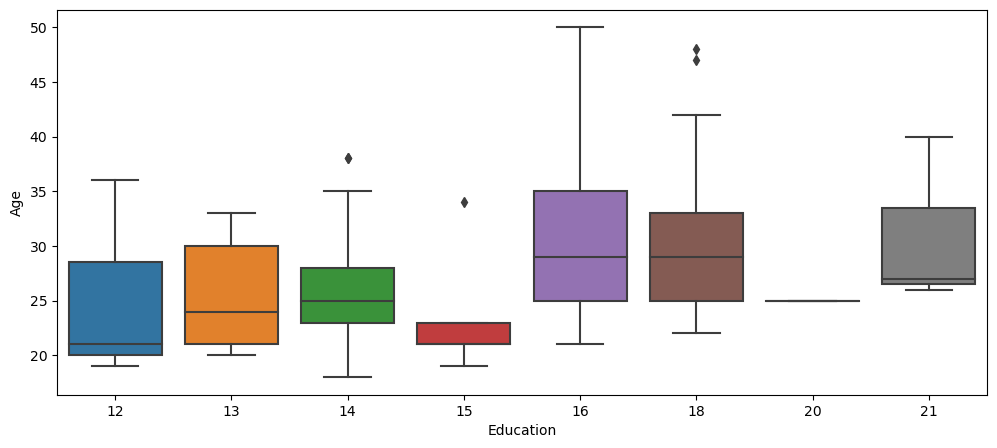

In [45]:
plt.figure(figsize=(12, 5))
sns.boxplot(df["Education"],df["Age"])

 - Above box plot shows Education data against Age of the customer

<AxesSubplot:xlabel='Usage', ylabel='MaritalStatus'>

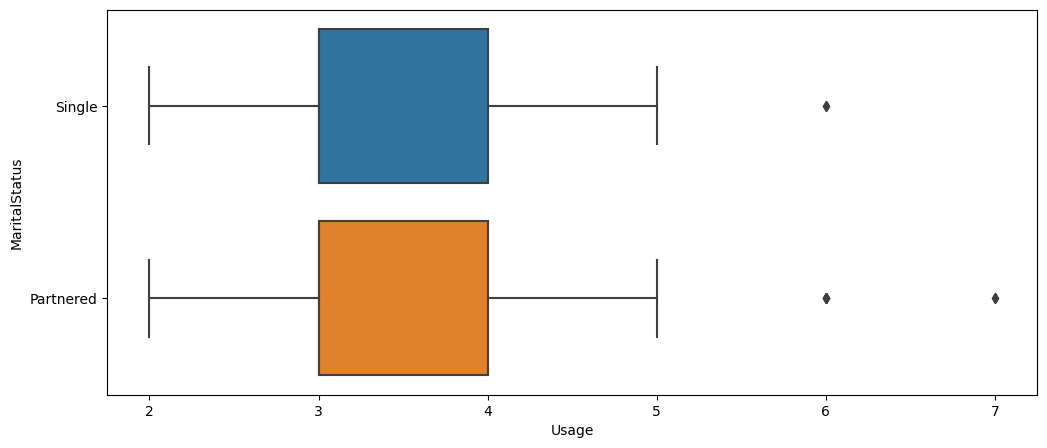

In [46]:
plt.figure(figsize=(12, 5))
sns.boxplot(df["Usage"],df["MaritalStatus"])

- The usage of products is consistent for both partnered and single individuals.
- However, there is a small subset of customers who intend to use the treadmill for more than 5 days a week, representing outliers in the data.

<AxesSubplot:xlabel='Product', ylabel='Income'>

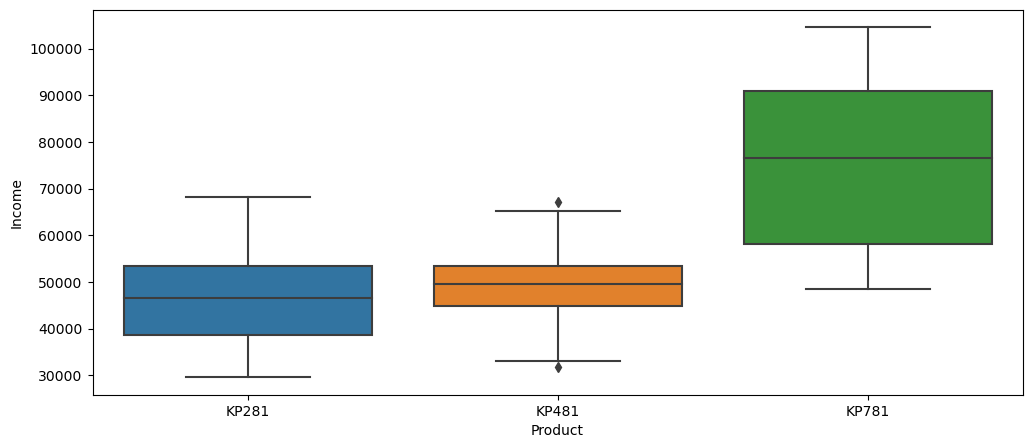

In [47]:
plt.figure(figsize=(12, 5))
sns.boxplot(df["Product"],df["Income"])

- Individuals with higher earnings demonstrate a preference for purchasing KP781, followed by KP481 and then KP281.

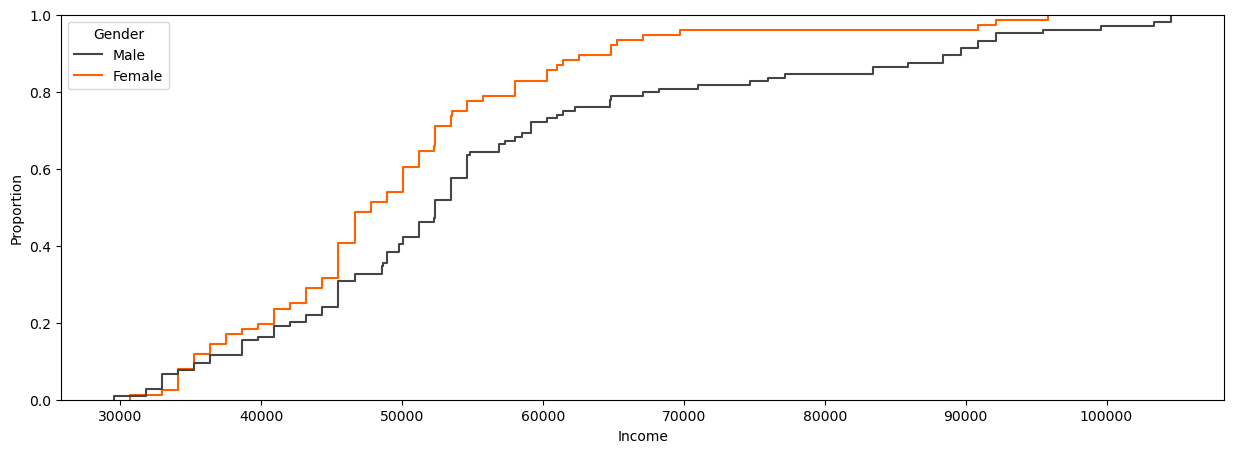

In [48]:
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='Gender',complementary=False,palette=['#454545','#FF6000'])
plt.show()

 - Customers with minimum of 30K as annual income are the ones that are able to afford aerofit products
 - Couple of Female customers less than 30K have also purchased aerofit product
 - Male customers with Higher salaries are the most common purchasers of the product

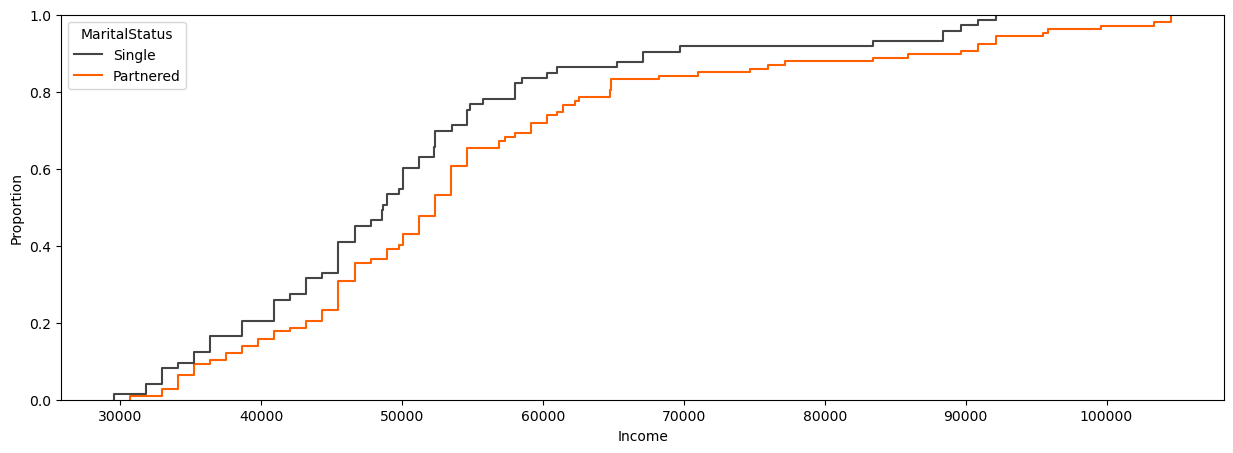

In [49]:
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='MaritalStatus',complementary=False,palette=['#454545','#FF6000'])
plt.show()

 - Single customer have higher proportion than partnered customers
 - Partnered customers are more than single customers and they also earn more than single customers

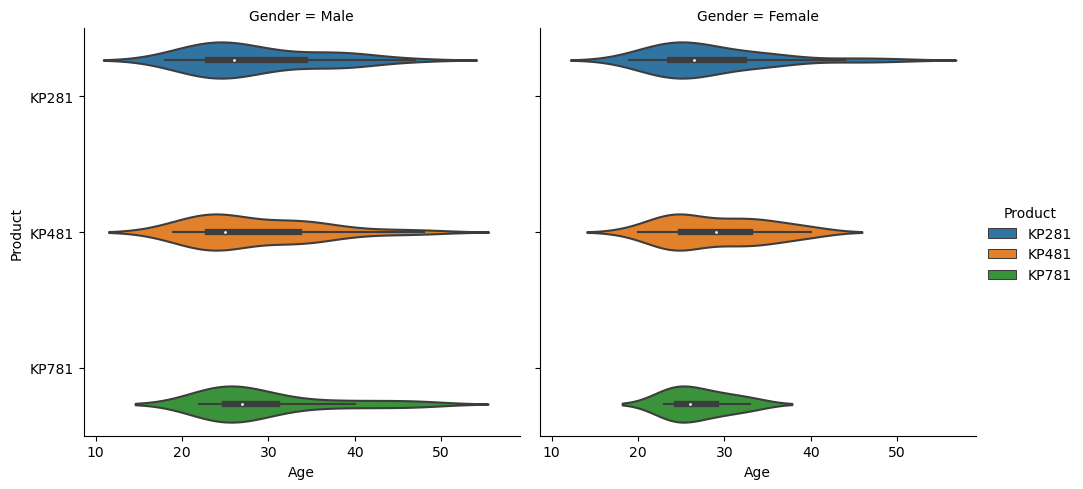

In [50]:
# Product used among age group seggregated by Gender
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=df,kind='violin')
plt.show()

 - From the above catplot, male customers are equally distributed among the three product types
 - Female customers tend to use product KP281 and KP481 more than advanced KP781 product
 - Female customers tend to prefer less complicated products than their male counterparts

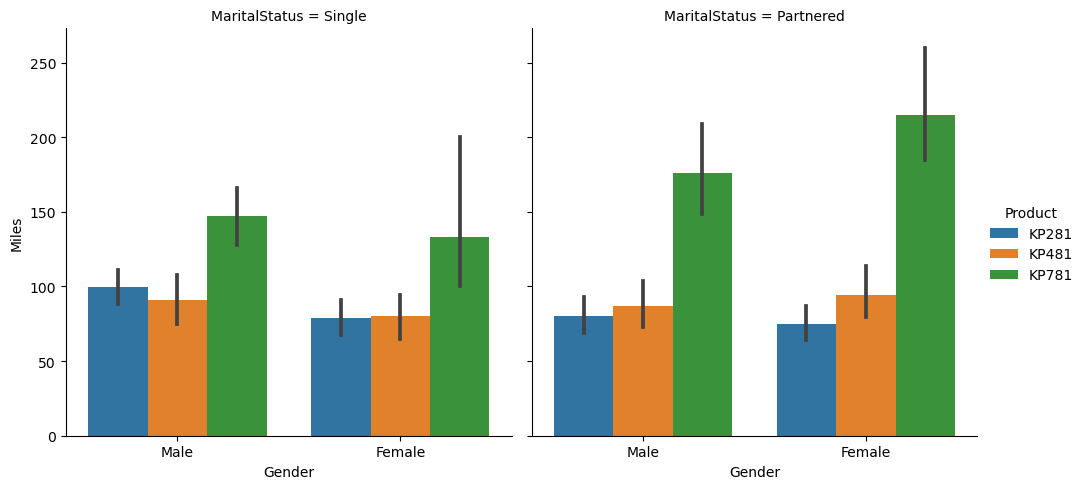

In [51]:
# Miles covered in each product by gender and their marital status
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df,kind='bar')
plt.show()

 - KP781 is more popular among the single and Partnered customers
 - Among the both marital statuses, Single female does not prefer much of the products. 
 - Partnered Female bought KP781 treadmill compared to Partnered Male.
 - Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
 - Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
 - There are more single Males buying treadmill than single Females.
 - Single Male customers bought KP781 treadmill compared to single Female.
 - Partnered customers are more than Single customers.

# Multivariate Analysis

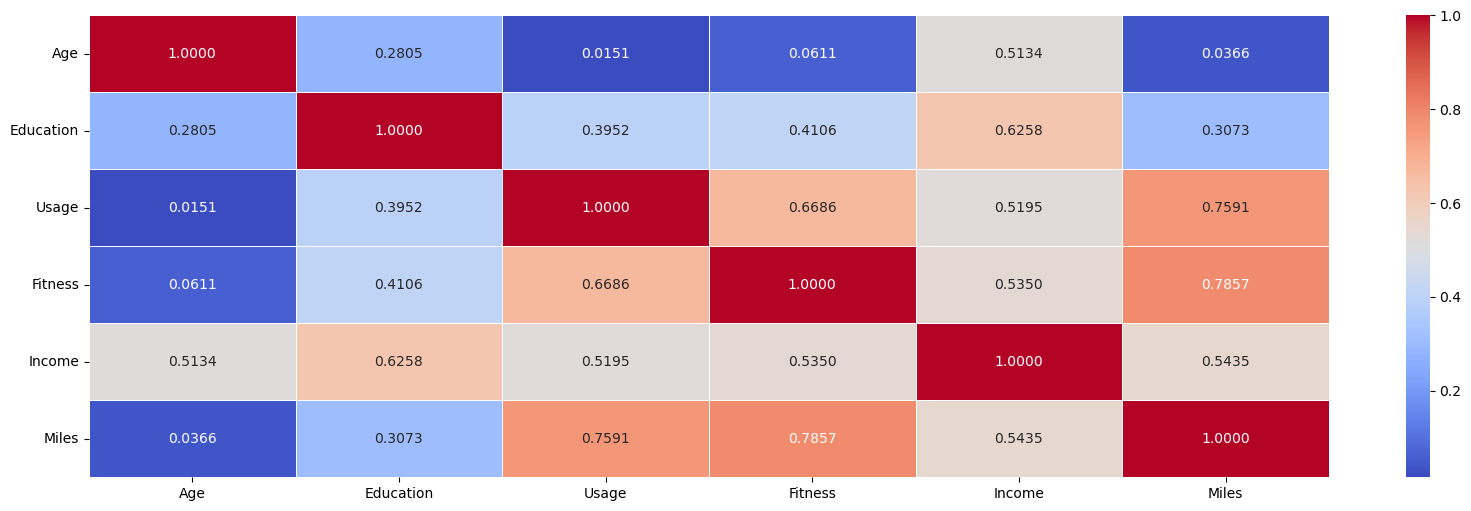

In [52]:
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated


 - Correlation between Age and Miles is 0.03
 - Correlation between Education and Income is 0.62
 - Correlation between Usage and Fitness is 0.66
 - Correlation between Fitness and Age is 0.06
 - Correlation between Income and Usage is 0.51
 - Correlation between Miles and Age is 0.03

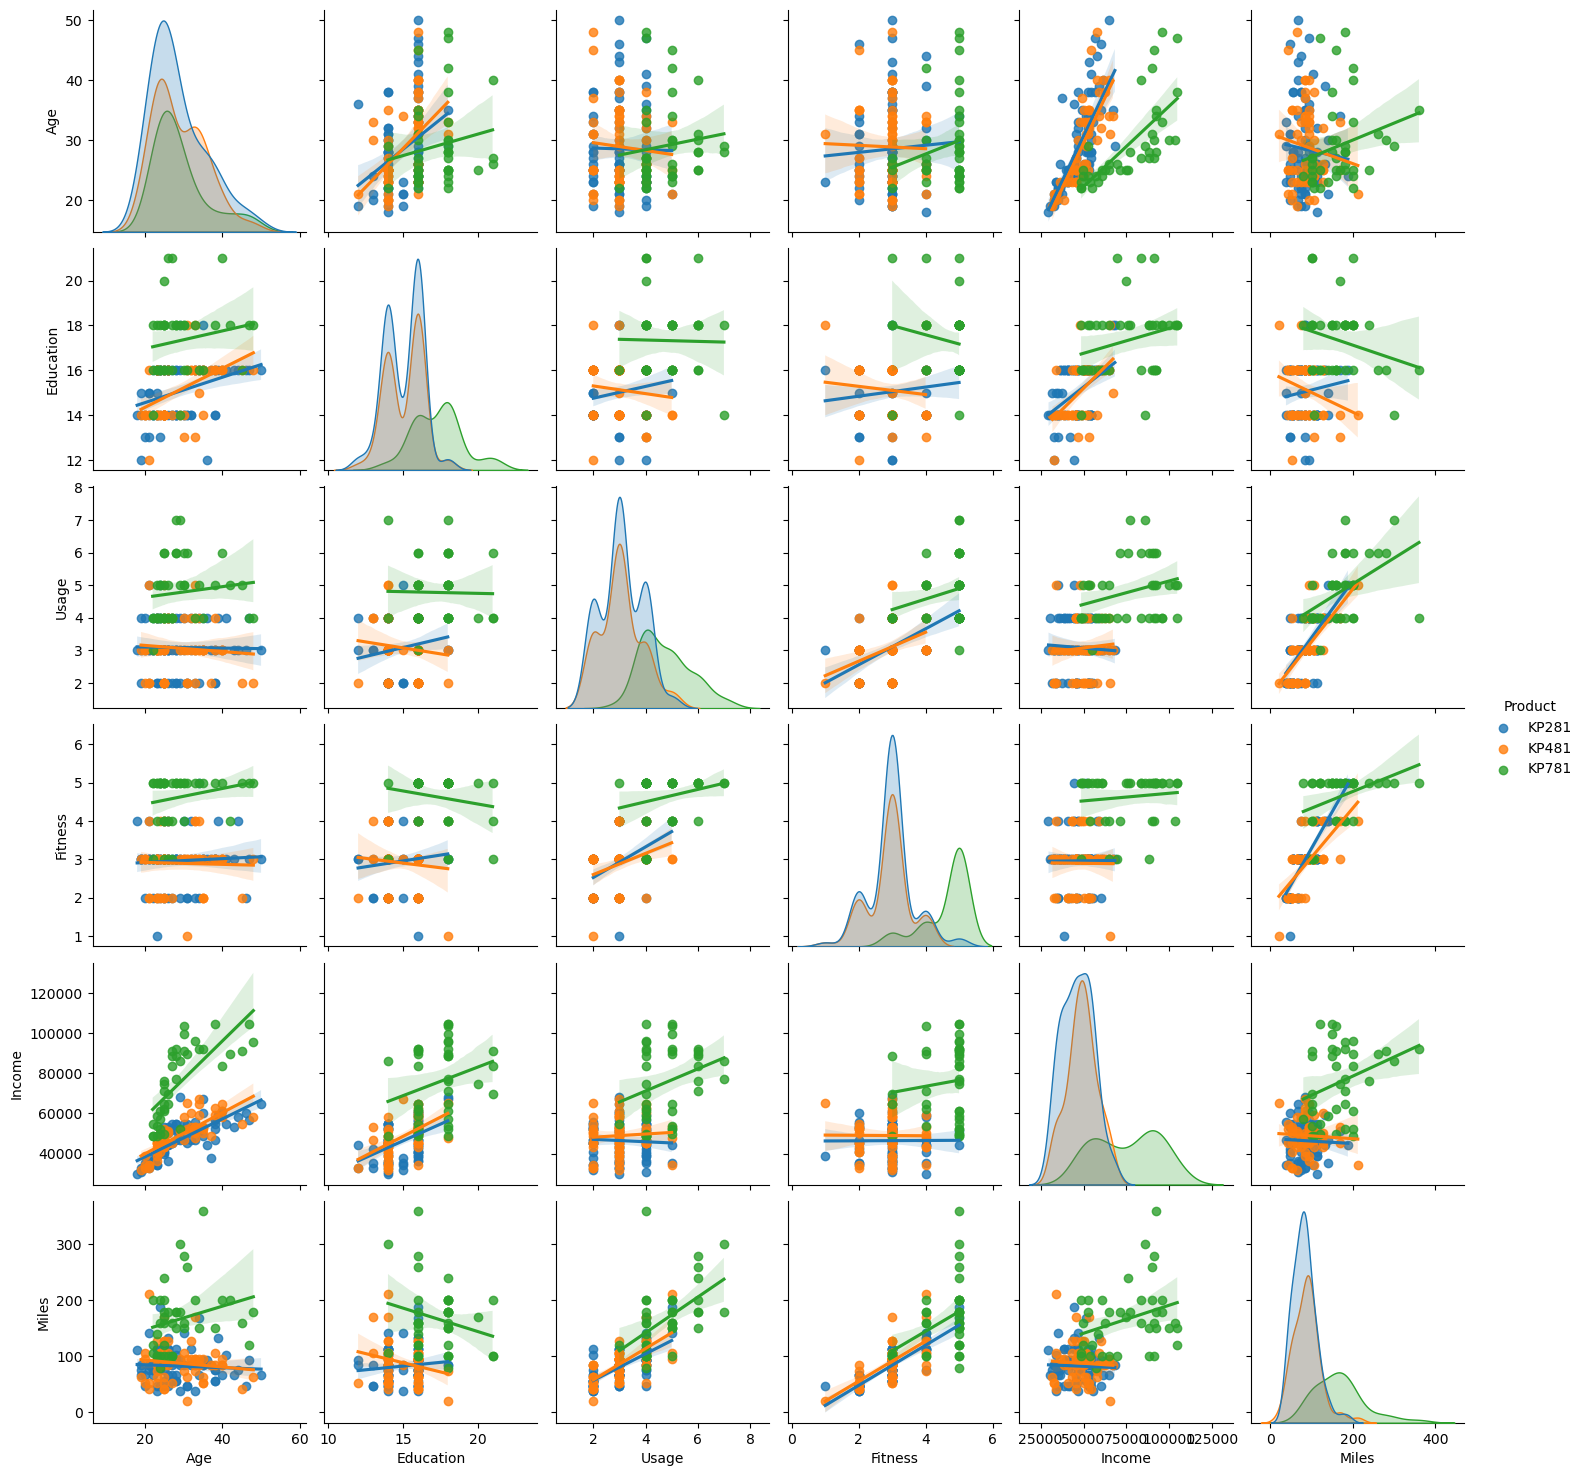

In [53]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

- In the above pairplot the correlation with products and different attributes are as similar to previous observation

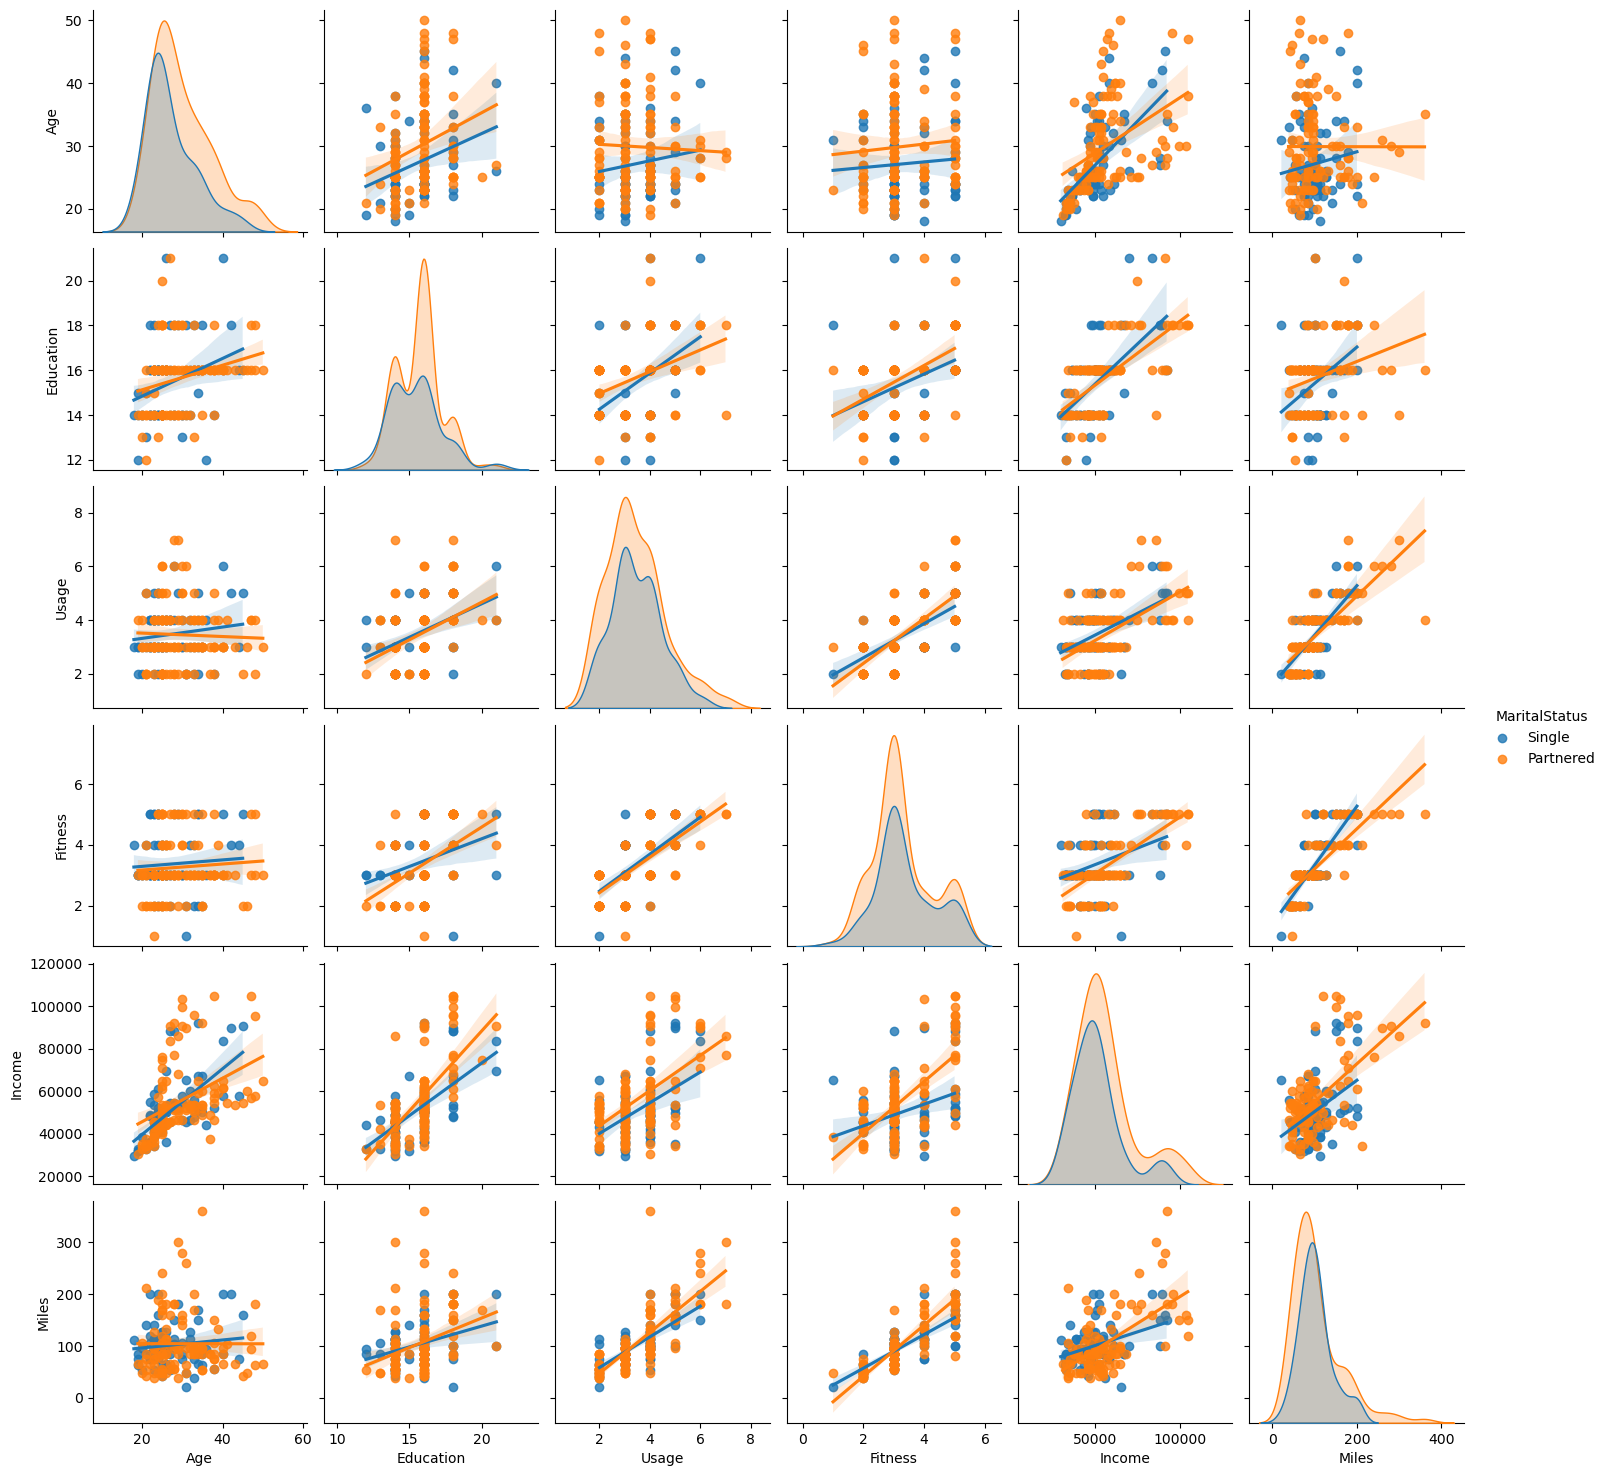

In [54]:
# Marital Status - pair plot
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()

- In the above pair plot the correlation with other attributes are pivotted around the marital status of the customer

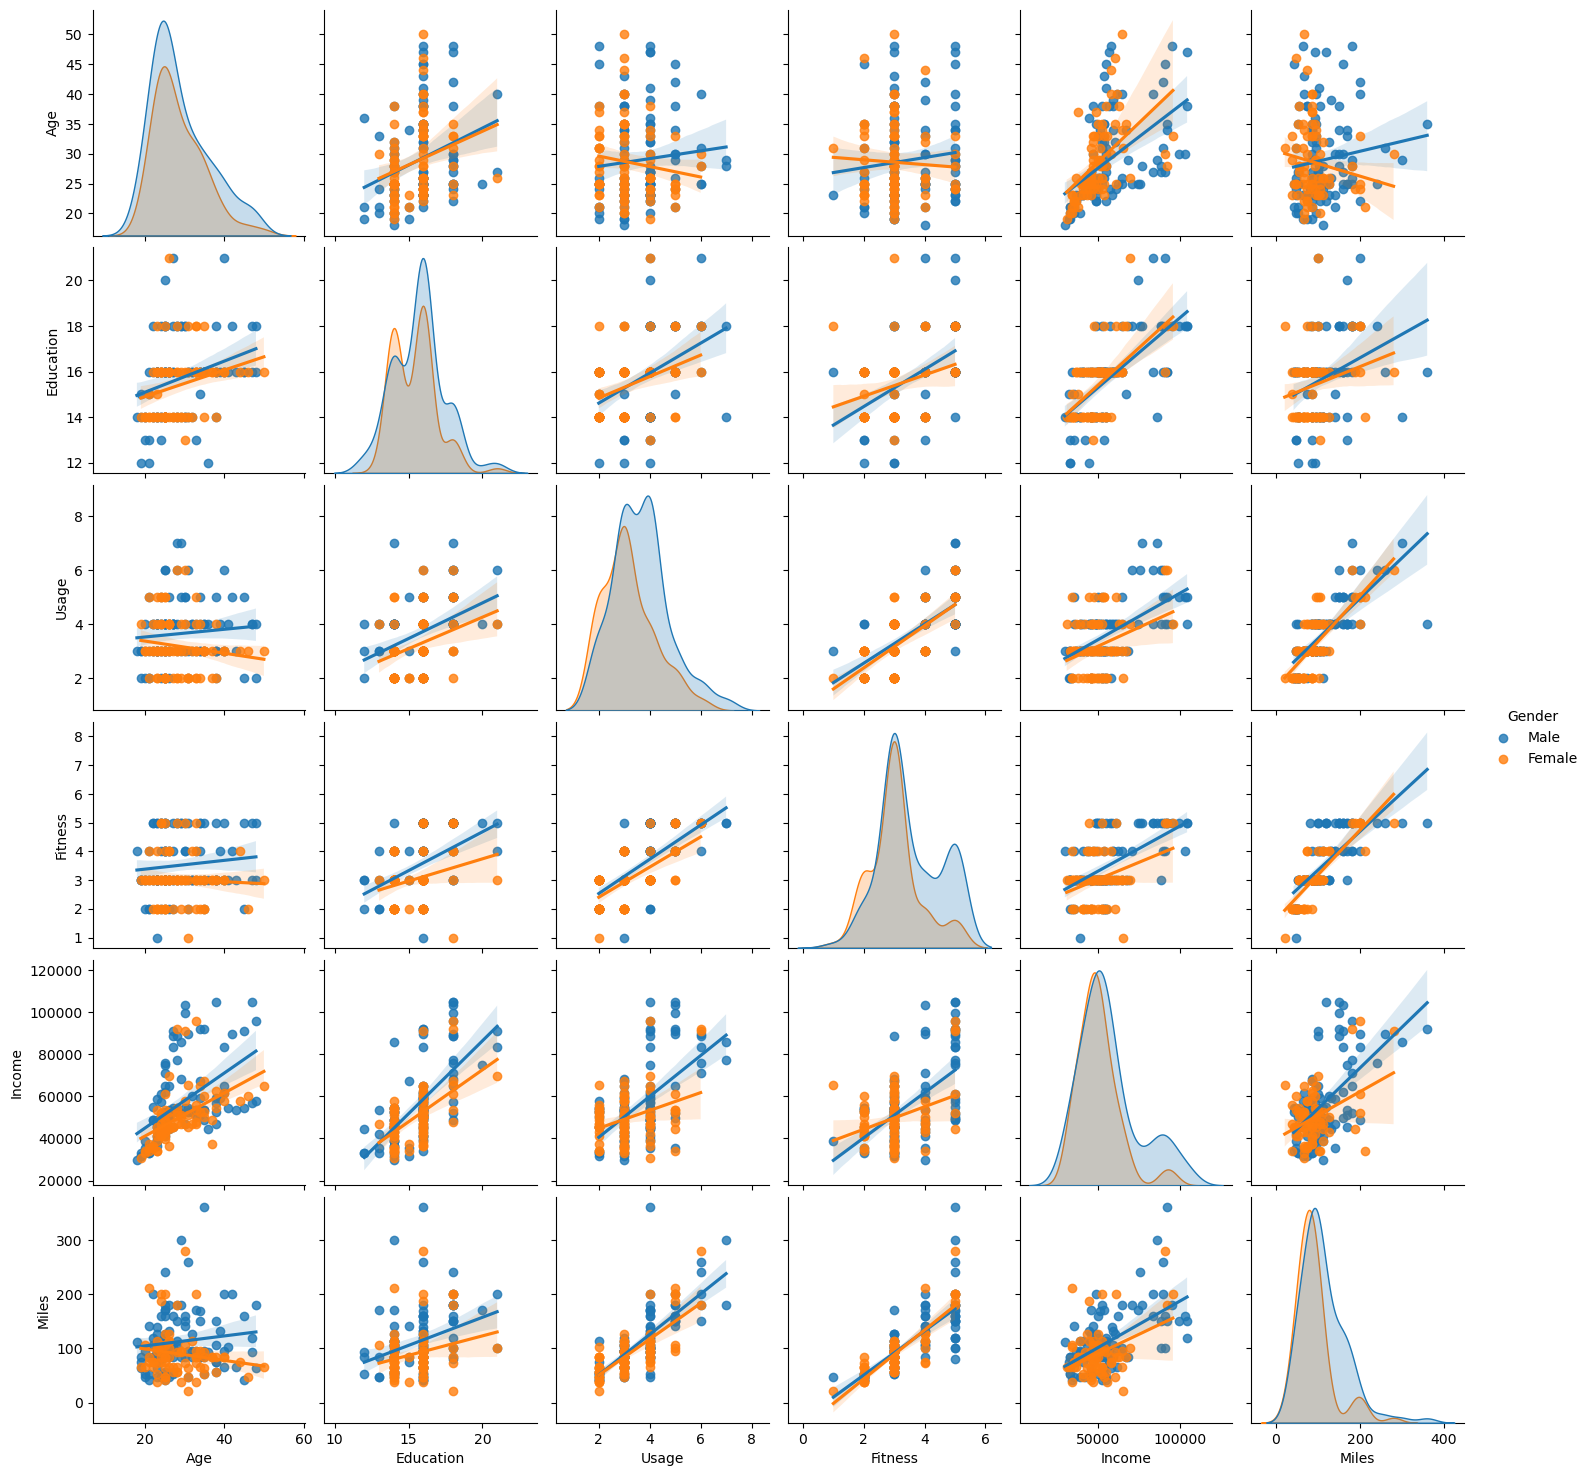

In [55]:
# Gender Analysis - Pair Plot
sns.pairplot(df,hue='Gender',kind='reg')
plt.show()

- Here the pair plot's correlation is same as the above mentioned heatmap

In [56]:
df.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

- Probability of buying **KP281, KP481 & KP781** are **0.44, 0.33 & 0.22** respectively

In [57]:
df.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

 - Probability of Male customer is 0.57
 - Probability of Female customer is 0.42

In [58]:
df.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

 - Probability of Married/Partnered is 0.59
 - Probability of Single is 0.40

**Probability for each product for the both genders**

In [59]:
def gender_Probability(gender,df):
    print(f"Prob P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")
    
df_temp = pd.crosstab(index=df['Gender'],columns=[df['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


**Probability of each product for given Marital Status**

In [60]:
def MS_Probability(ms_status,df):
    print(f"Prob P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")
    
df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


#### Customer Age Group Analysis

In [61]:
df_cat['age_group'] = df_cat.Age
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [62]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
df_cat.age_group = pd.cut(df.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [63]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [64]:
df_cat.age_group.value_counts()

Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [65]:
df_cat.loc[df_cat.Product=='KP281']["age_group"].value_counts()

Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [66]:
df_cat.loc[df_cat.Product=='KP481']["age_group"].value_counts()

Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: age_group, dtype: int64

In [67]:
df_cat.loc[df_cat.Product=='KP781']["age_group"].value_counts()

Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [68]:
pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [69]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize='columns',margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


In [70]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize=True,margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


In [71]:
pd.crosstab(columns=df_cat["Fitness_category"],index=df_cat["Product"])

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,54,14,2,9,1
KP481,39,12,0,8,1
KP781,4,0,29,7,0


In [72]:
round(pd.crosstab(index=df_cat["Product"],columns=df_cat["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [73]:
pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [74]:
round(pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender,normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [75]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

### Conditional and Marginal Probabilities

**Two-Way Contingency Table**

**Marginal Probabilities**

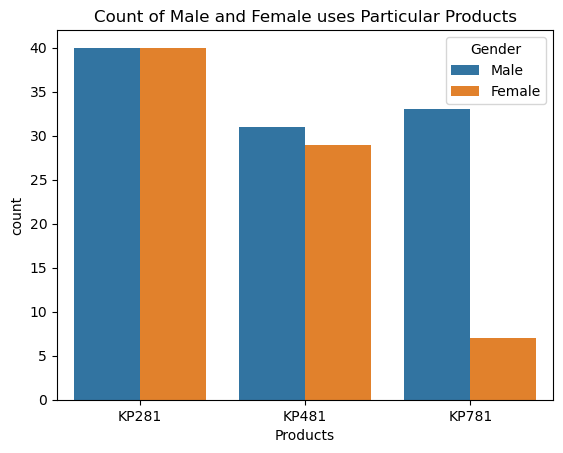

In [76]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [77]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [78]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

 - Probability of Male Customer Purchasing any product is : 57.77 %

 - Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer buying**

 - product KP281 is : 44.44 % (cheapest / entry level product)

 - product KP481 is : 33.33 % (intermediate user level product)

 - product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

**Conditional Probabilities**

In [79]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 / Female = 52 %
KP481 / Female = 38 %

KP781 / Female = 10 %

KP281 / male = 38 %

KP481 / male = 30 %

KP781 / male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

## Objective: Customer Profiling for Each Product

Customer profiling based on the 3 product categories provided

**KP281**

 - Easily affordable entry level product, which is also the maximum selling product.
 
 
 - KP281 is the most popular product among the entry level customers.
 
 
 - This product is easily afforded by both Male and Female customers.
 
 
 - Average distance covered in this model is around 70 to 90 miles.
 
 
 - Product is used 3 to 4 times a week.
 
 
 - Most of the customer who have purchased the product have rated Average shape as the fitness rating.
 
 
 - Younger to Elder beginner level customers prefer this product.
 
 
 - Single female & Partnered male customers bought this product more than single male customers.
 
 
 - Income range between 39K to 53K have preferred this product.


**KP481**

 - This is an Intermediate level Product.


 - KP481 is the second most popular product among the customers.


 - Fitness Level of this product users varies from Bad to Average Shape depending on their usage.


 - Customers Prefer this product mostly to cover more miles than fitness.


 - Average distance covered in this product is from 70 to 130 miles per week.


 - More Female customers prefer this product than males.


 - Probability of Female customer buying KP481 is significantly higher than male.


 - KP481 product is specifically recommended for Female customers who are intermediate user.


 - Three different age groups prefer this product - Teen, Adult and middle aged.


 - Average Income of the customer who buys KP481 is 49K.


 - Average Usage of this product is 3 days per week.


 - More Partnered customers prefer this product.


 - There are slightly more male buyers of the KP481.


 - The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.


 - The buyers of KP481 in Single & Partnered, Male & Female are same.


 - The age range of KP481 treadmill customers is roughly between 24-34 years.


**KP781**

 - Due to the High Price & being the advanced type, customer prefers less of this product.


 - Customers use this product mainly to cover more distance.


 - Customers who use this product have rated excelled shape as fitness rating.


 - Customer walk/run average 120 to 200 or more miles per week on his product.


 - Customers use 4 to 5 times a week at least.


 - Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.


 - Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).


 - Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.


 - Middle aged to higher age customers tend to use this model to cover more distance.
 
 
 - Average Income of KP781 buyers are over 75K per annum
 
 
 - Partnered Female bought KP781 treadmill compared to Partnered Male.
 
 
 - Customers who have more experience with previous aerofit products tend to buy this product
 
 
 - This product is preferred by the customer where the correlation between Education and Income is High.
 

## Recommendation


 - Female who prefer exercising equipments are very low here.  Hence, we should run a marketing campaign on to encourage women to exercise more

 - KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.
 
 
 - As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.
 
 
 - KP781 product should be promotted using influencers and other international atheletes.
 

 - Research required for expanding market beyond 50 years of age considering health pros and cons.
 
 
 - Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.
 
 
 - KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.
 
 
 - Target the Age group above 40 years to recommend Product KP781.